In [216]:
# import

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.linalg import expm
import pandas as pd

In [217]:
# Define multiple subspaces

# A1: linear bidirectional  track
A1 = np.array([[0,1,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0],[0,1,0,1,0,0,0,0,0,0],[0,0,1,0,1,0,0,0,0,0],[0,0,0,1,0,1,0,0,0,0],[0,0,0,0,1,0,1,0,0,0],[0,0,0,0,0,1,0,1,0,0],[0,0,0,0,0,0,1,0,1,0],[0,0,0,0,0,0,0,1,0,1],[0,0,0,0,0,0,0,0,1,0]])

# A2: circular bidirectional track
A2 = np.array([[0,1,0,0,0,0,0,0,0,1],[1,0,1,0,0,0,0,0,0,0],[0,1,0,1,0,0,0,0,0,0],[0,0,1,0,1,0,0,0,0,0],[0,0,0,1,0,1,0,0,0,0],[0,0,0,0,1,0,1,0,0,0],[0,0,0,0,0,1,0,1,0,0],[0,0,0,0,0,0,1,0,1,0],[0,0,0,0,0,0,0,1,0,1],[1,0,0,0,0,0,0,0,1,0]])

# A3: 2D box
k  = np.array([[1,10],[0,2,11],[1,3,12],[2,4,13],[3,5,14],[4,6,15],[5,7,16],[6,8,17],[7,9,18],[8,19],[0,11,20],[1,10,12,21],[2,11,13,22],[3,12,14,23],[4,13,15,24],[5,14,16,25],[6,15,17,26],[7,16,18,27],[8,17,19,28],[9,18,29],[10,21,30],[11,20,22,31],[12,21,23,32],[13,22,24,33],[14,23,25,34],[15,24,26,35],[16,25,27,36],[17,26,28,37],[18,27,29,38],[19,28,39],[20,31,40],[21,30,32,41],[22,31,33,42],[23,32,34,43],[24,33,35,44],[25,34,36,45],[26,35,37,46],[27,36,38,47],[28,37,39,48],[29,38,49],[30,41,50],[31,40,42,51],[32,41,43,52],[33,42,44,53],[34,43,45,54],[35,44,46,55],[36,45,47,56],[37,46,48,57],[38,47,49,58],[39,48,59],[40,51,60],[41,50,52,61],[42,51,53,62],[43,52,54,63],[44,53,55,64],[45,54,56,65],[46,55,57,66],[47,56,58,67],[48,57,59,68],[49,58,69],[50,61,70],[51,60,62,71],[52,61,63,72],[53,62,64,73],[54,63,65,74],[55,64,66,75],[56,65,67,76],[57,66,68,77],[58,67,69,78],[59,68,79],[60,72,80],[61,70,72,81],[62,71,73,82],[63,72,74,83],[64,73,75,84],[65,74,76,85],[66,75,77,86],[67,76,78,87],[68,77,79,88],[69,78,89],[70,81,90],[71,80,82,91],[72,81,83,92],[73,82,84,93],[74,83,85,94],[75,84,86,95],[76,85,87,96],[77,86,88,97],[78,87,89,98],[79,88,99],[80,91],[81,90,92],[82,91,93],[83,92,94],[84,93,95],[85,94,96],[86,95,97],[87,96,98],[88,97,99],[89,98]]);
A3 = np.zeros((100,100))
for i in range(0,len(k)):
    u = k[i]
    j = np.zeros((100,))
    for e in range(0,len(u)):
        j[u] = 1
        A3[i,:] = j

In [218]:
# Define the adjacency matrix of interest
A = A3

# Calculate communicability
C = scipy.linalg.expm(A)

# Calculate intuitive distance
I = -np.log(C)

# Pick a state of interest
state  = 4

# Calculate measures from this state
Astate = A[state,:]
Cstate = C[state,:]
Istate = I[state,:]

# Calculate measures to this state
Astate = A[:,state]
Cstate = C[:,state]
Istate = I[:,state]

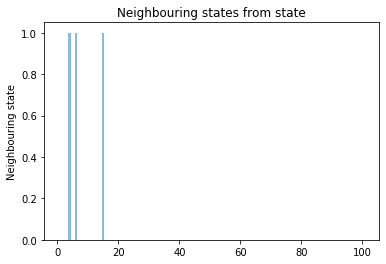

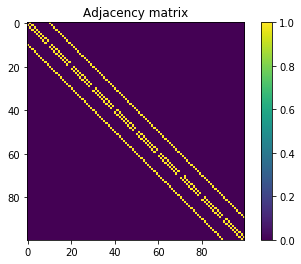

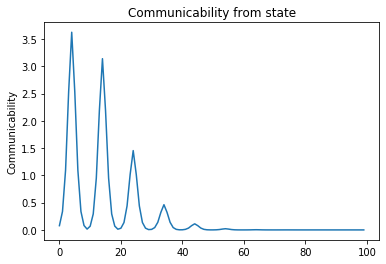

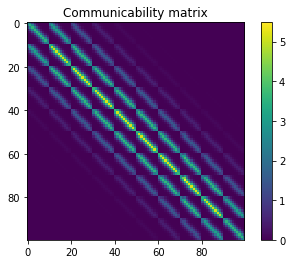

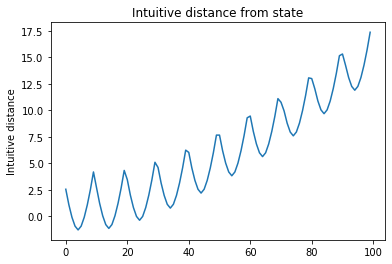

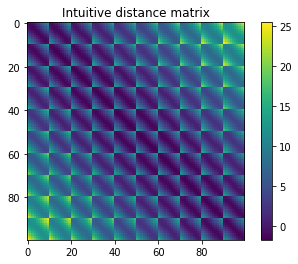

In [219]:
# Plot figures

plt.figure()
# Plot adjacency from the state
x = np.arange(len(Astate))+1
plt.bar(x, Astate, alpha=0.5)
plt.title('Neighbouring states from state')
plt.ylabel('Neighbouring state')
plt.show()
# Plot adjacency
plt.imshow(A)
plt.title('Adjacency matrix')
plt.colorbar()
plt.show()
# Plot communicability from the state
plt.plot(Cstate)
plt.title('Communicability from state')
plt.ylabel('Communicability')
plt.show()
# Plot communicability
plt.imshow(C)
plt.title('Communicability matrix')
plt.colorbar()
plt.show()
# Plot intuitive distance from the state
plt.plot(Istate)
plt.title('Intuitive distance from state')
plt.ylabel('Intuitive distance')
plt.show()
# Plot intuitive distance
plt.imshow(I)
plt.title('Intuitive distance matrix')
plt.colorbar()
plt.show()

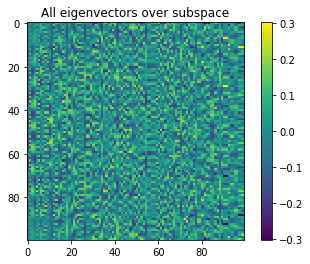

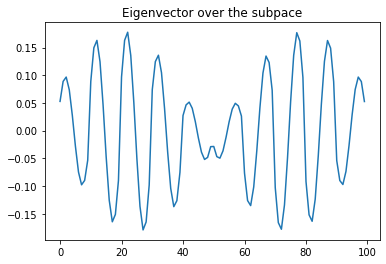

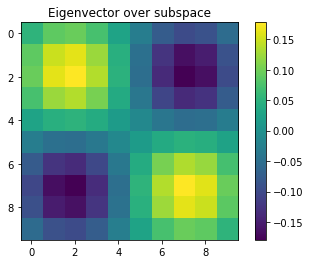

In [220]:
# eigenvector decomposition of A
ed,v = np.linalg.eig(A)
v = np.real(v)
# Plot eigenvectors
plt.figure()
plt.imshow(v)
plt.title('All eigenvectors over subspace')
plt.colorbar()
plt.show()
    
# select eigenvector to plot
eig = 6

# Plot individual eigenvector over the subspace
u = v[:,eig]
plt.figure()
plt.plot(u)
plt.title('Eigenvector over the subpace')

# Plot individual eigenvector over the subspace
k = np.reshape(u,(10,10))
plt.figure()
plt.imshow(k)
plt.title('Eigenvector over subspace')
plt.colorbar()
plt.show()

Text(0, 0.5, 'Intuitive distance')

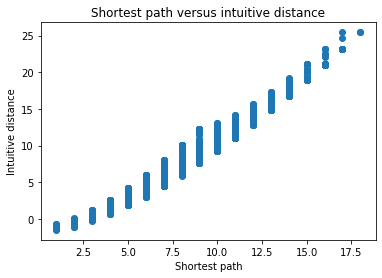

In [221]:
# plot intuitive distance versus shortest path between each pair
 
# find non-diagnonal entries of I
i = np.where(~np.eye(I.shape[0],dtype=bool))
k = I[i]

# find non-diagnonal entries of shortest path
s = scipy.sparse.csgraph.shortest_path(A)
l = np.where(~np.eye(s.shape[0],dtype=bool))
p = s[l]

# k is the indutive distance for all pairs
# p is the shortest path between all pairs
plt.figure()
plt.scatter(p,k)
plt.title('Shortest path versus intuitive distance')
plt.xlabel('Shortest path')
plt.ylabel('Intuitive distance')

In [222]:
# implementing the intutive planning algorithm

# eigenvector decomposition
ed,v = np.linalg.eig(A)
# start and target
originalstate = 1;
targetstate  = 51;
# initialise
currentstate = originalstate;
stepno = 1;
route = [originalstate]

In [223]:
while currentstate != targetstate:
    d = np.where(A[currentstate,:] > 0)[0]
    cntall = np.zeros(len(d))
    cnt = np.zeros(len(v))
    for i in range(0,len(d)):
        # for each neighbour, calculate the communicability to the target
        for k in range(0,len(v)):
            nstate = d[i]
            vd = v[:,k]
            vN = vd[nstate]
            vT = vd[targetstate]
            lam = ed[k]
            cnt[k] = vN*vT*np.exp(lam)
        cntall[i] = np.sum(cnt)
    # pick the maximal cnt 
    nextstatei = np.argmax(cntall)
    currentstate=d[nextstatei]
    stepno = stepno+1
    route.append(currentstate)

/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


In [224]:
print(route)

[1, 11, 21, 31, 41, 51]
